# 8o Lab de PSD (notebook para preencher com os resultados)

### Número do Grupo : 2
#### Pedro Malandrin Klesse - 790746
#### Vitor Caligaris Figueira - 790743

# **1.0 - Projeto de Filtros FIR por Janelas: Conceitos e a Janela Retangular**

Neste laboratório, revisaremos os conceitos básicos de projeto de filtros digitais. Também discutiremos brevemente as vantagens dos filtros FIR sobre os filtros IIR, como a estabilidade e a resposta de fase linear. Por fim, veremos uma introdução ao projeto de filtros FIR por meio do **método de janela**.

## **1.1 - Por que precisamos de filtros?**

Os filtros são usados ​​em uma ampla variedade de aplicações. Na maioria das vezes, o objetivo final de usar um filtro é obter um tipo de seletividade de frequência no espectro do sinal de entrada.

Como exemplo, suponha que um ruído de 50 Hz seja observado em um sinal produzido por um sensor. O componente de ruído pode ser forte o suficiente para limitar a precisão da medição. A saída do sensor é normalmente convertida em sinal digital por um conversor AD para ser processado por DSP ou por um microcontrolador. Portanto, podemos usar um filtro digital após o AD para eliminar o componente de ruído. Neste exemplo em particular, um filtro rejeita banda (notch) centrado em 50 Hz pode ser utilizado para suprimir o ruído.

Neste ponto, vale a pena rever a resposta em frequência de um filtro prático. A Figura (1) mostra um exemplo de um filtro passa-baixa prático. Neste exemplo, os componentes de frequência na banda passante, de DC para $\omega_p$, passará pelo filtro quase sem atenuação. Os componentes na banda de parada (rejeição), acima de $\omega_s$, sofrerá uma atenuação significativa. Observe que a resposta em frequência de um filtro prático não pode ser absolutamente plana na banda passante ou na banda de parada. Conforme mostrado na Figura (1), algumas ondulações serão inevitáveis e a banda de transição, $\omega_p < \omega < \omega_s$, não pode ser infinitamente abrupta na prática.

<img src="Fig1_1.webp" style="display=block; margin:auto" width=500/>
<p style="text-align: center">
    <b>Figura 1 - Resposta em frequência de um filtro passa-baixa prático.</b>
</p>

## **1.2 - Considerações Gerais**

O projeto de um filtro digital envolve quatro etapas:

**1) Determinação das especificações**

Primeiro, precisamos determinar quais especificações são necessárias. Esta etapa depende completamente da  aplicação. No exemplo do ruído de 50 Hz na saída do sensor, precisamos saber **o quão forte é o componente de ruído em relação ao sinal desejado** e quanto precisamos suprimir do ruído. Esta informação é necessária para encontrar o filtro com a **ordem mínima** (filtro de menor comprimento) para esta aplicação.

**2) Determinação da função de transferência**

Com as especificações do projeto conhecidas, precisamos encontrar uma função de transferência que forneça a filtragem necessária. A **função de transferência** racional de um filtro digital é dada como na Equação (1).

\begin{align}
H(z) = \frac{\sum_{k=0}^{M-1}b_{k}z^{-k}}{\sum_{k=0}^{N-1}a_{k}z^{-k}}
\label{eq:Hz} \tag{1}
\end{align}

Nesta etapa calcula-se os coeficientes, $a_k$ e $b_k$, na Equação $\eqref{eq:Hz}$.

**3) Escolhendo uma estrutura de realização**

Agora que H(z) é conhecido, devemos escolher a estrutura de realização. Em outras palavras, existem muitos sistemas que podem fornecer a função de transferência obtida e devemos escolher aquele que é mais apropriado. Por exemplo, qualquer uma das formas direta I, II, cascata, paralela, transposta ou de rede ([freebook](https://www.dsprelated.com/freebooks/filters/)) pode ser usada para realizar uma função de transferência específica. A principal diferença entre as estruturas de realização mencionadas acima é sua sensibilidade ao uso de um comprimento finito de bits. Observe que no **sistema digital final**, usaremos um **comprimento finito de bits** para representar um sinal ou um coeficiente de filtro. Algumas realizações, como formas diretas, são muito sensíveis à quantização dos coeficientes. No entanto, as estruturas em cascata e paralelas apresentam menor sensibilidade e são preferidas.

**4) Implementação do filtro**

Depois de decidir qual estrutura de realização usar, devemos implementar o filtro. Você tem algumas opções para esta etapa: uma implementação de software (como um código python, Matlab ou C) ou uma implementação de hardware (como hardware de DSP, um microcontrolador ou um ASIC).

Este artigo se concentra na segunda etapa do projeto de um filtro FIR.

## **1.3 - Filtros FIR**

Um filtro FIR é um caso especial da Equação $\eqref{eq:Hz_FIR}$, em que $a_0 = 1$ e $a_k = 0$, para $k=1,\ldots,N−1$ e, portanto, obtemos:

\begin{align}
H(z) = \sum_{k=0}^{M-1}b_{k}z^{-k}.
\label{eq:Hz_FIR} \tag{2}
\end{align}

A realização direta da Equação $\eqref{eq:Hz_FIR}$ para $M=3$ é mostrada na Figura (2). Conforme mostrado nesta figura, um filtro digital pode ser implementado usando apenas três elementos:

1. Adição
2. Multiplicação por uma constante (necessária para a implementação dos coeficientes)
3. Blocos de atraso

<img src="Fig2_1.webp" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Figura 2 - Forma direta de um filtro FIR de ordem 2</b>
</p>

Existem três coeficientes e duas células (blocos) de atraso na Figura (2). Observe que este filtro é de **ordem 2, o número de células de atraso**, e não 3, o número de coeficientes.

Um **filtro FIR tem duas vantagens importantes sobre um projeto IIR**:

Em primeiro lugar, como mostra a Figura (2), não existe um loop de realimentação na estrutura de um filtro FIR. Por não ter um loop de feedback, **um filtro FIR é inerentemente estável**. Enquanto isso, **para um filtro IIR, precisamos verificar a estabilidade**.

Em segundo lugar, **um filtro FIR pode fornecer uma resposta de fase linear**. Na verdade, **uma resposta de fase linear é a principal vantagem de um filtro FIR sobre um projeto IIR** - caso contrário, para as mesmas especificações de filtragem, um filtro IIR levará a uma ordem mais baixa.

Para ter um **filtro FIR de fase linear**, devemos fornecer simetria no domínio do tempo, ou seja, $b[n] = \pm  b[M−1−n]$. No exemplo mostrado na Figura (2), suponha que $b_0=b_2$, e fazendo $z = e^{j\omega}$, então a Equação (2) fornece

\begin{align}
H(e^{j\omega}) = b_0 + b_1e^{-j\omega} + b_0e^{-j2\omega} = e^{-j\omega}(b_1 + 2b_0 \cos(\omega)).
\label{eq:Hz_FIR_symm} \tag{3}
\end{align}

Como $b_k$ é real, a fase de $H(z)$ será

\begin{align}
\angle H(e^{j\omega})=\begin{cases}
-\omega_{p} & , b_{1}+2b_{0}\cos(\omega)>0\\
-\omega_{p}+\pi & , b_{1}+2b_{0}\cos(\omega)<0
\end{cases}
\label{eq:Hz_FIR_phase} \tag{4}
\end{align}

Portanto, a resposta de fase será linear. Embora este exemplo mostre uma resposta de fase linear no caso de um filtro de três derivações, pode ser mostrado que para um valor arbitrário de $M$, **a simetria no domínio do tempo leva a uma resposta de fase linear**. Esta é uma propriedade importante que nos ajuda a examinar a resposta de fase linear de um filtro FIR apenas considerando os valores de **b_k** sem nenhum cálculo.

O leitor pode se perguntar por que uma resposta de frequência de fase linear é importante. Para obter insights, considere o caso de tempo contínuo. Suponha que a resposta em frequência de um sistema seja

\begin{align}
H(e^{j\omega}) = \alpha (e^{-j\omega})^\beta = \alpha e^{-j\beta \omega}
\label{eq:Hz_FIR_ex} \tag{5}
\end{align}

em que $\alpha$ e $\beta$ são constantes reais. A resposta de fase deste sistema é linear, ou seja, $\angle H(z) = -\beta \omega$.

Se aplicarmos $x(t)=A \cos(\omega_1t)$ a este sistema, a saída será $y(t)=\alpha A \cos(\omega_1t−\beta \omega_1)=\alpha x(t−\beta)$. Portanto, a resposta de fase linear corresponde a um atraso constante. Um sistema com uma resposta de fase não linear irá distorcer a entrada, mesmo se $|H(z)|$ é constante. Em tal sistema, diferentes componentes de frequência da entrada sofrerão diferentes atrasos de tempo à medida que passam pelo sistema. Para um sistema digital com uma resposta de fase de $\angle H(z) = -k\omega$ onde $k$ é um número inteiro, também podemos provar que a fase linear é igual a um atraso constante.


## **1.4 - Introdução ao projeto de filtro FIR por janelas**

Explicarei o método da janela usando um exemplo. Suponha que queremos projetar um **filtro passa-baixas** com uma frequência de corte de $\omega_c$, ou seja, a resposta de frequência desejada será:

\begin{align}
H_d(\omega)=\begin{cases}
1 & |\omega| < \omega_c\\
0 & \textrm{caso contrário}
\end{cases}
\label{eq:Hd} \tag{6}
\end{align}

Para encontrar a representação equivalente no domínio do tempo, calculamos a transformada inversa de Fourier em tempo discreto:

\begin{align}
h_d[n] = \frac{1}{2\pi}\int_{-\pi}^{+\pi} H_d(\omega)e^{j\omega n}d\omega
\label{eq:hn1} \tag{7}
\end{align}

Substituindo a Equação $\eqref{eq:Hd}$ na Equação $\eqref{eq:hn1}, obtemos:

\begin{align}
h_d[n] = \frac{1}{2\pi}\int_{-\omega_c}^{+\omega_c} e^{j\omega n}d\omega = \frac{\sin(n\omega_c)}{n\pi}
\label{eq:hn2} \tag{8}
\end{align}

A Equação $\eqref{eq:hn2}$ para $\omega_c=\frac{\pi}{4}$ é mostrada
na Figura (3).

<img src="Fig3.webp" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Figura 3 - Resposta ao impulso de um filtro passa-baixas ideal com $\omega_c=\frac{\pi}{4}$</b>
</p>

A Figura (3) mostra que $h_d[n]$ precisa de um número infinito de amostras de entrada para realizar a filtragem e que o sistema não é um sistema causal.

A solução óbvia será truncar a resposta ao impulso e usar, por exemplo, apenas 21 amostras da entrada e assumir outros coeficientes como zero. A intuição sugere que, à medida que o número de amostras aumenta, a resposta ao impulso truncada estará mais próxima da resposta ao impulso ideal na Figura (3) e, portanto, a resposta em frequência do filtro obtido estará mais próxima da Equação $\eqref{eq:Hd}$.

Por outro lado, à medida que aumentamos o número de amostras, mais hardware será necessário. Se optarmos por usar apenas 21 toques da resposta ideal, haverá três opções que são mostradas nas Figuras (4) a (6).

A primeira opção é mostrada na Figura (4). Esta resposta ao impulso corresponde a um sistema não causal e não pode ser utilizada.

<img src="Fig4.webp" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Figura 4 - Resposta ao impulso truncada: fase linear, mas não causal.</b>
</p>

A próxima opção é mostrada na Figura (5) que, apesar de ser causal, não possui uma resposta de fase linear (a propriedade mais importante de um sistema FIR).

<img src="Fig5.webp" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Figura 5 - Resposta ao impulso truncada: fase causal, mas não linear.</b>
</p>

A última opção é mostrada na Figura (6). Este sistema é tanto uma fase causal quanto linear. A única desvantagem desse sistema é seu atraso, que é $\frac{M-1}{2}$ amostras. Em outras palavras, em resposta a um impulso em n=0, o sistema não reagirá até quase $n=\frac{M-1}{2}$. Esse atraso pode causar problemas em algumas aplicações.

<img src="Fig6.webp" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Figura 6 - Resposta ao impulso truncada: fase causal e linear.</b>
</p>

O truncamento da resposta ao impulso é equivalente a multiplicar $h_d[n]$ (ou sua versão deslocada) por uma janela retangular $w[n]$, que é igual a um para $n=0,\ldots,M−1$ e zero caso contrário. Portanto, considerando o deslocamento aplicado, obtemos a resposta ao impulso do filtro projetado:

\begin{align}
h[n] = h_d[n - \frac{M-1}{2}] w[n]
\label{eq:hn3} \tag{9}
\end{align}

Claramente, o espectro da janela retangular fará com que a resposta do filtro se desvie da resposta ideal na Equação $\eqref{eq:Hd}$. A Figura (7) compara a resposta do filtro projetado com a do filtro ideal.

Esta figura mostra que, diferentemente do filtro ideal, o filtro projetado possui uma transição mais suave da banda passante para a banda final. Além disso, existem algumas ondulações na banda de passagem e na banda de parada de
$H(\omega)$.

<img src="Fig7.webp" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Figura 7 - Resposta de frequência do filtro projetado por uma janela retangular.</b>
</p>

## **Resumo**

- Para projetar um filtro digital, precisamos encontrar os coeficientes, $a_k$ e $b_k$, na Equação (1).
- Um filtro FIR é um caso especial da Equação (1), onde $a_0=1$ e $a_k=0$ para $k=1,\ldots,N−1$.
- Estabilidade e resposta de fase linear são as duas vantagens mais importantes de um filtro FIR sobre um filtro IIR.
- Uma resposta de frequência de fase linear corresponde a um atraso constante.
- O truncamento da resposta ao impulso é equivalente a multiplicar $h_d[n]$ por uma janela retangular, $w[n]$, que é igual a um para $n=0,\ldots,M−1$ e zero caso contrário.
- Uma banda de transição mais ampla e ondulações na banda de passagem e na banda de parada são as diferenças mais importantes entre os filtros ideais e aqueles projetados pelo método de janela.

## **1.5 - Verificando a sua compreensão da teoria**

Questão 1) Como podemos tornar a banda de transição mais nítida?

-> Para tornar a banda de transição mais nítida podemos mudar a o valor superior da banda de passagem e inferior da banda de corte(no caso de um passa-baixas) para que eles fiquem cada vez mais próximos. Vale ressaltar que isso aumenta o ripple, portanto, é necessário aumentar o taps para haver um equilíbrio nessa alteração.

Questão 2) Como podemos diminuir as ondulações?

-> As ondulações podem ser diminuídas através do aumento de taps(número de quoeficientes) no filtro.

Questão 3) Que outras opções existem para serem usadas em vez de uma janela retangular?

-> Existem diversas opções de janelas como por exemplo janela Bartlett, Hanning, Hamming e Blackman, cada tipo diferente de janela gerará diversas respostas em relação à quantidade e intensidade de ripple assim como diferentes velocidades de decaimento na banda de transição.

# **2.0 - Exemplos de implementação**

## **2.1 - Usando uma biblioteca em python para a implementação de filtros FIR**

Para a realização dos exercícios abaixo, estude as seguintes funções:

a) scipy.signal.freqz  ([Referência](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html))

b) scipy.signal.firwin  ([Referência](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.get_window.html#scipy.signal.get_window))

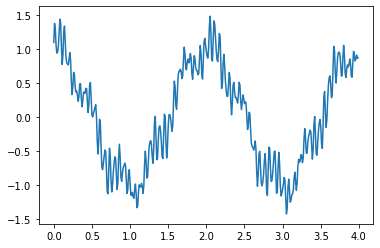

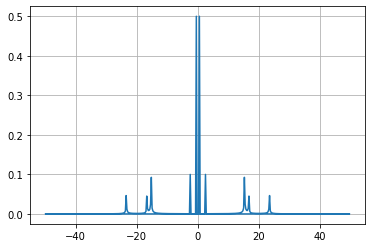

In [ ]:
from numpy import cos, sin, pi, absolute, arange
import numpy as np
from scipy.signal import kaiserord, lfilter, firwin, freqz
from scipy.fft import fft, fftfreq, fftshift
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show

#--------------------------------------------------------
# Cria um sinal para demonstração com
# taxa de amostragem de 100 Hz e duração de 4 segundos
#--------------------------------------------------------
SAMPLE_RATE = 100  # Hertz
DURATION = 4       # Seconds
NUM_SAMPLES = SAMPLE_RATE * DURATION

t = arange(NUM_SAMPLES) / SAMPLE_RATE
x = cos(2*pi*0.5*t) + 0.2*sin(2*pi*2.5*t+0.1) + \
        0.2*sin(2*pi*15.3*t) + 0.1*sin(2*pi*16.7*t + 0.1) + \
            0.1*sin(2*pi*23.45*t+.8)

# Plota o sinal original
figure(1)
plot(t, x)

#----------------------------------------------------------------------
# Plota a magnitude do espectro do sinal x definido acima
# Use a seguinte referência - https://realpython.com/python-scipy-fft/
#----------------------------------------------------------------------
fft_x  = fft(x)
freq_x = fftfreq(NUM_SAMPLES, 1.0 / SAMPLE_RATE)

figure(2)
plot(freq_x, 1.0/NUM_SAMPLES * np.abs(fft_x))

grid()
show()

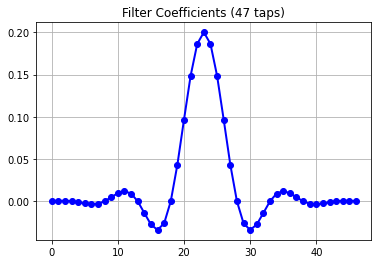

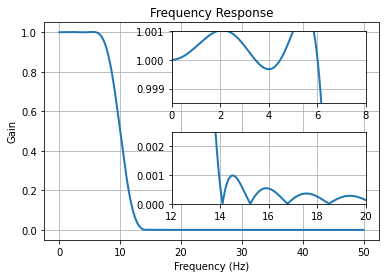

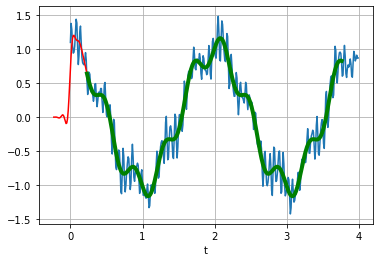

In [ ]:
#-------------------------------------------------------
# Cria um filtro FIR e aplica ao sinal x definido acima
#-------------------------------------------------------

# Taxa de amostragem de Nyquist de um sinal.
nyq_rate = SAMPLE_RATE / 2.0

# A largura desejada da transição de passagem para parada,
# em relação à taxa de Nyquist. Vamos projetar o filtro
# com uma largura de transição de 5 Hz.
width = 5.0/nyq_rate

# A atenuação desejada na banda de parada, em dB.
ripple_db = 60.0

# Calcula a ordem e o parâmetro Kaiser para o filtro FIR.
N, beta = kaiserord(ripple_db, width)

# A frequência de corte do filtro.
cutoff_hz = 10.0

# Use firwin com uma janela Kaiser para criar um filtro FIR passa-baixa.
taps = firwin(N, cutoff_hz/nyq_rate, window=('kaiser', beta))

# Use lfilter para filtrar x com o filtro FIR.
filtered_x = lfilter(taps, 1.0, x)

#------------------------------------------------
# Plote os coeficientes do filtro FIR.
#------------------------------------------------
figure(1)
plot(taps, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % N)
grid(True)

#------------------------------------------------
# Plote a resposta de magnitude do filtro.
#------------------------------------------------
figure(2)
clf()
w, h = freqz(taps, worN=8000)
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
ylim(-0.05, 1.05)
grid(True)

# Plotagem de inserção superior.
ax1 = axes([0.42, 0.6, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(0,8.0)
ylim(0.9985, 1.001)
grid(True)

# Plotagem de inserção inferior
ax2 = axes([0.42, 0.25, .45, .25])
plot((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlim(12.0, 20.0)
ylim(0.0, 0.0025)
grid(True)

#------------------------------------------------
# Plote os sinais originais e filtrados.
#------------------------------------------------

# O atraso de fase do sinal filtrado.
delay = 0.5 * (N-1) / SAMPLE_RATE

figure(3)
# Plota o sinal original
plot(t, x)
# Plote o sinal filtrado, deslocado para compensar o atraso de fase.
plot(t-delay, filtered_x, 'r-')
# Plote apenas a parte "boa" do sinal filtrado. O primeiro N-1
# amostras estão "corrompidas" pelas condições iniciais.
plot(t[N-1:]-delay, filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()

## **2.2 - Usando as funções da biblioteca SciPy para projetar filtros FIR**

### 2.2.1 - Funções para plotar as respostas em frequência e fase

In [ ]:
from pylab import *
import scipy.signal as signal

#
# Plotar magnitude e fase da resposta em frequência
#
def mfreqz(b,a=1):
    w,h = signal.freqz(b,a)
    h_dB = 20 * log10 (abs(h))

    figure(figsize=(10,10))
    subplot(211)
    plot(w/max(w),h_dB)
    ylim(-150, 5)
    ylabel('Magnitude (dB)')
    xlabel(r'Frequência normalizada ($\pi$ rad/amostra)')
    title(r'Resposta em frequência')

    subplot(212)
    h_Phase = unwrap(arctan2(imag(h),real(h)))
    plot(w/max(w),h_Phase)
    ylabel('Phase (radianos)')
    xlabel(r'Frequência normalizada ($\pi$ rad/amostra)')
    title(r'Fase')
    subplots_adjust(hspace=0.25)

#
# Plot step and impulse response
#
def impz(b,a=1):
    l = len(b)
    impulse = repeat(0.,l); impulse[0] =1.
    x = arange(0,l)
    response = signal.lfilter(b,a,impulse)

    figure(figsize=(10,10))
    subplot(211)
    stem(x, response)
    ylabel('Amplitude')
    xlabel(r'n (amostras)')
    title(r'Resposta a impulso')

    subplot(212)
    step = cumsum(response)
    stem(x, step)
    ylabel('Amplitude')
    xlabel(r'n (amostras)')
    title(r'Resposta a degrau')
    subplots_adjust(hspace=0.25)

### 2.2.2 - Filtro FIR - passa baixas

Projetar um filtro FIR passa-baixa é muito simples com o SciPy, tudo o que você precisa fazer é definir o **comprimento da janela**, **a frequência de corte** e **a janela**.

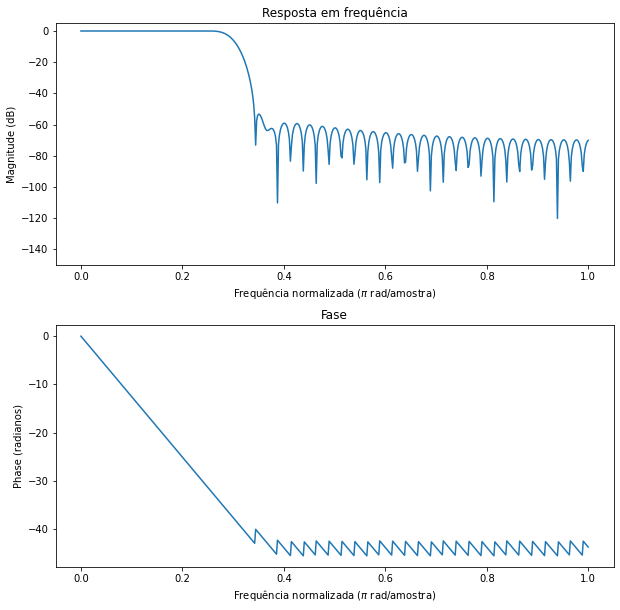

In [ ]:
#
# Usando janela de HAMMING
#

n = 81  # number of taps
a = signal.firwin(n, cutoff = 0.3, window = "hamming")

# Resposa em frequência e fase
mfreqz(a)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


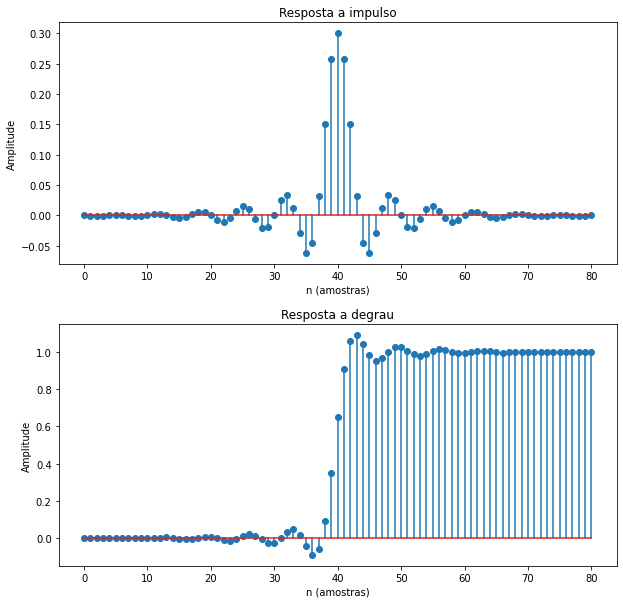

In [ ]:
# Respostas impulsiva e a degrau
impz(a)

### 2.2.3 - Filtro FIR - passa altas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


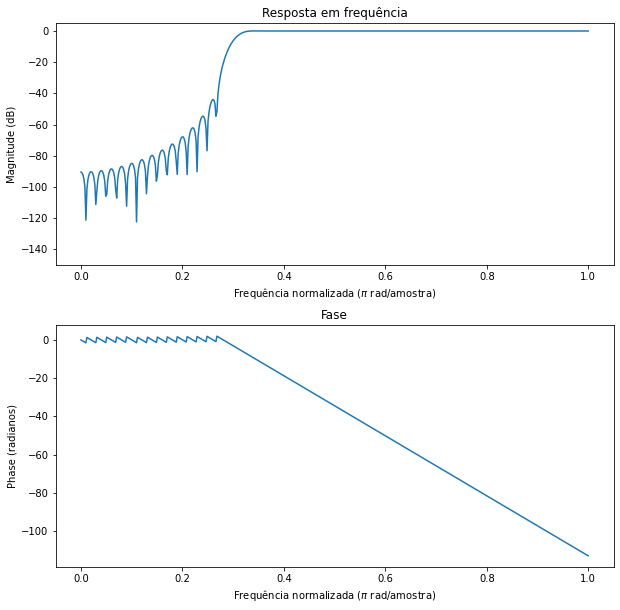

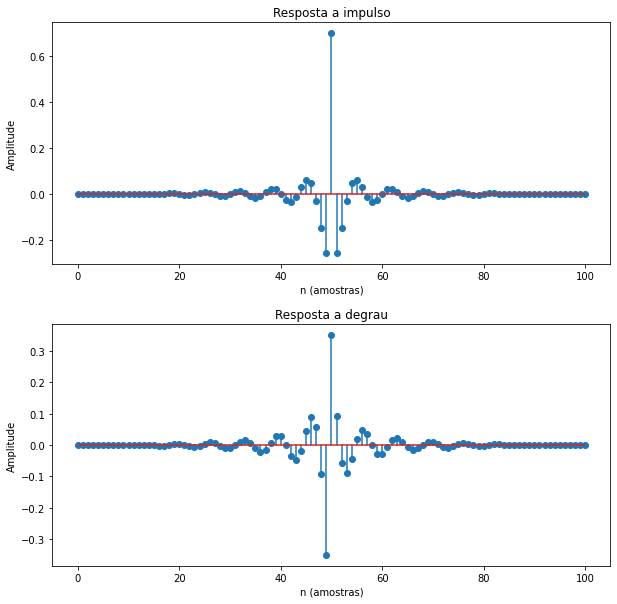

In [ ]:
#
# Usando janela de HANNING
#

n = 101
a = signal.firwin(n, cutoff = 0.3, window = "hanning", pass_zero = False)
mfreqz(a)
impz(a)

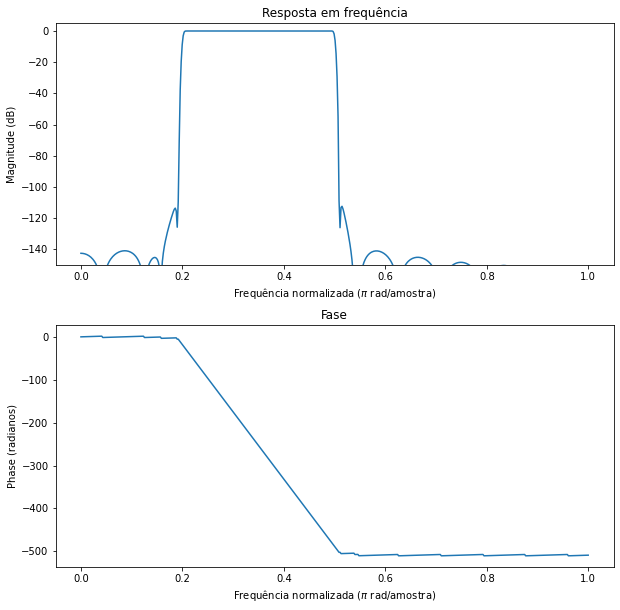

In [ ]:
#
# Usando janela de BLACKMAN-HARRIS
#

n = 1001
a = signal.firwin(n, cutoff = [0.2, 0.5], window = 'blackmanharris', pass_zero=False)
mfreqz(a)

### 2.2.4 - Tipos de Janelas

<img src="windowtable.png" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Figura 8 - Alguns tipos de janelas.</b>
</p>

<img src="Types_of_Windows.png" style="display=block; margin:auto"/>
<p style="text-align: center">
    <b>Figura 9 - Resposta em frequência e os valores dos pesos.</b>
</p>

# **3.0 - Testando uma ferramenta para projeto de filtros FIR**


Agora vamos testar uma ferramente que permite projetar filtros FIR.

Entre no site da ferramenta [TFilter](http://t-filter.engineerjs.com/) e teste vários projetos de filtros. Obserse o que acontece quando modificamos os diferentes parâmetros disponíveis.

# **That's it for now !!**